## 数值特征工程
```
数值特征工程主要包括：1. 连续数值处理:特征值归一化、标准化处理 2.离散数值处理 
```

## 1.特征数值处理-标准化和归一化处理
```
1. Standard Scala 标准化处理
```
### Standard Scaler $\frac{x_i - \mu}{\sigma}$

```
2. MaxMinScala 归一化处理
```
### Min-Max Scaler $\frac{x_i - min(x)}{max(x) - min(x)}$

```
3.Robust Scaler 归一化处理，鲁棒性较好，当数据离散值较多时使用该方法效果较好
```
### Robust Scaler $\frac{x_i - median(x)}{IQR_{(1,3)}(x)}$

```
4. 非线性归一化处理：对于数据分布分布较大，分布形式和正态分布相差较大时，可以使用log变换、指数变换、反正切方式对数据进行放缩，
为了使数据趋于正态分布，一般使用log变换
```
### log变换:   $\frac{lg(x)}{lg(max)}$

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

In [2]:
views = pd.DataFrame([1295., 25., 19000., 5., 1., 300.], columns=['views'])
views

,views
0,1295.0
1,25.0
2,19000.0
3,5.0
4,1.0
5,300.0


### 标准化处理 Standard Scaler $\frac{x_i - \mu}{\sigma}$

In [3]:
ss = StandardScaler()
views['zscore'] = ss.fit_transform(views[['views']])
views

,views,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


In [4]:
vw = np.array(views['views'])
(vw[0] - np.mean(vw)) / np.std(vw)

-0.30721413311687235

### 归一化 Min-Max Scaler $\frac{x_i - min(x)}{max(x) - min(x)}$

In [5]:
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['views']])
views

,views,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


In [6]:
(vw[0] - np.min(vw)) / (np.max(vw) - np.min(vw))

0.06810884783409653

###  鲁棒性归一化处理 Robust Scaler $\frac{x_i - median(x)}{IQR_{(1,3)}(x)}$

In [7]:
rs = RobustScaler()
views['robust'] = rs.fit_transform(views[['views']])
views

,views,zscore,minmax,robust
0,1295.0,-0.307214,0.068109,1.092883
1,25.0,-0.489306,0.001263,-0.132690
2,19000.0,2.231317,1.000000,18.178528
3,5.0,-0.492173,0.000211,-0.151990
4,1.0,-0.492747,0.000000,-0.155850
5,300.0,-0.449877,0.015738,0.132690


In [8]:
quartiles = np.percentile(vw, (25., 75.))
iqr = quartiles[1] - quartiles[0]
(vw[0] - np.median(vw)) / iqr

1.0928829915560916

### log变换:   $\frac{lg(x)}{lg(max)}$

In [20]:
max_value = views[['views']].max()
print(max_value)
views['log'] = np.log(views[['views']])/views[['views']].max()
views

views    19000.0
dtype: float64


,views,zscore,minmax,robust,log
0,1295.0,-0.307214,0.068109,1.092883,0.000377
1,25.0,-0.489306,0.001263,-0.132690,0.000169
2,19000.0,2.231317,1.000000,18.178528,0.000519
3,5.0,-0.492173,0.000211,-0.151990,0.000085
4,1.0,-0.492747,0.000000,-0.155850,0.000000
5,300.0,-0.449877,0.015738,0.132690,0.000300


## 2. 离散数据值处理

In [21]:
import pandas as pd
import numpy as np

In [22]:
vg_df = pd.read_csv('datasets/vgsales.csv', encoding = "ISO-8859-1")
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [23]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

### LabelEncoder
```
将离散的label数据转换为0-N的数据标签
```

In [26]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])

genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
print(genre_mappings)
vg_df['GenreLabel'] = genre_labels
print('===================================================================')
print(vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7])

{0: 'Action', 1: 'Adventure', 2: 'Fighting', 3: 'Misc', 4: 'Platform', 5: 'Puzzle', 6: 'Racing', 7: 'Role-Playing', 8: 'Shooter', 9: 'Simulation', 10: 'Sports', 11: 'Strategy'}
                       Name Platform    Year         Genre  GenreLabel
1         Super Mario Bros.      NES  1985.0      Platform           4
2            Mario Kart Wii      Wii  2008.0        Racing           6
3         Wii Sports Resort      Wii  2009.0        Sports          10
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing           7
5                    Tetris       GB  1989.0        Puzzle           5
6     New Super Mario Bros.       DS  2006.0      Platform           4


### Map操作
```
和LabelEncoder相似，将字符串离散数据转换为数字数据，但是和LabelEncoder不同的是，通过map方式可以自定义每一个离散数据类型所对应的数字
```

In [27]:
poke_df = pd.read_csv('datasets/Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)
np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [28]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3, 
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}

poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


### One-hot Encoding 
```
和Label Encoding不同的是，One-hot Encoding 只会将离散数据转换为0-1的数据，0表示没有当前label标签的数据，1表示有当前label标签的数据，对于多label的数据会把多label的数据转换为多列0-1标签的数据
```

In [48]:
df = poke_df[['Generation', 'GenerationLabel']]
df.head(5)

,Generation,GenerationLabel
0,Gen 1,1
1,Gen 4,4
2,Gen 2,2
3,Gen 6,6
4,Gen 2,2


In [49]:
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(df['Generation'])  #通过LabelEncoder变换可以将数据变换成数字 且 可以获取新生成特征的columns名
df['Gen_Label'] = gen_labels       
gen_ohe = OneHotEncoder()       
gen_feature_arr = gen_ohe.fit_transform(df[['Gen_Label']]).toarray()#数据通过OneHotEncoder变换
gen_feature_labels = list(gen_le.classes_)                          #获取生成columns名 并转换成列表
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)   #创建新的pandas数据
print(gen_features.head(5))

   Gen 1  Gen 2  Gen 3  Gen 4  Gen 5  Gen 6
0    1.0    0.0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    1.0    0.0    0.0
2    0.0    1.0    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0    0.0    1.0
4    0.0    1.0    0.0    0.0    0.0    0.0


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Get Dummy
```
和one-hot-encoding功能相似
```

In [52]:
df = poke_df[['Generation', 'GenerationLabel']]
df.head(5)

,Generation,GenerationLabel
0,Gen 1,1
1,Gen 4,4
2,Gen 2,2
3,Gen 6,6
4,Gen 2,2


In [54]:
gen_dummy_features = pd.get_dummies(df['Generation'], drop_first=True)
print(gen_dummy_features.head(5))

   Gen 2  Gen 3  Gen 4  Gen 5  Gen 6
0      0      0      0      0      0
1      0      0      1      0      0
2      1      0      0      0      0
3      0      0      0      0      1
4      1      0      0      0      0


### 二值特征

In [57]:
popsong_df = pd.read_csv('datasets/song_views.csv', encoding='utf-8')
print(popsong_df.head(3))
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(5)

                                    user_id             song_id  \
0  b6b799f34a204bd928ea014c243ddad6d0be4f8f  SOBONKR12A58A7A7E0   
1  b41ead730ac14f6b6717b9cf8859d5579f3f8d4d  SOBONKR12A58A7A7E0   
2  4c84359a164b161496d05282707cecbd50adbfc4  SOBONKR12A58A7A7E0   

            title  listen_count  
0  You're The One             2  
1  You're The One             0  
2  You're The One             0  


,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0


### 多项式特征处理
```
通过多项式变换方式新增特征数据：
eg: 特征 A  B经过多项式变换之后 变成  A  B A的平方 A乘以B B的平方
```

In [58]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,104,78
1,92,75
2,46,34
3,50,58
4,105,75


In [59]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)  #设定多项式操作句柄
res = pf.fit_transform(atk_def)                                                 #进项多项式变换
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2']) #指定数据 和 变换列表名
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,104.0,78.0,10816.0,8112.0,6084.0
1,92.0,75.0,8464.0,6900.0,5625.0
2,46.0,34.0,2116.0,1564.0,1156.0
3,50.0,58.0,2500.0,2900.0,3364.0
4,105.0,75.0,11025.0,7875.0,5625.0


### binning特征
```
将数值按照指定的bin划分
```

                               ID.x                    EmploymentField   Age  \
0  cef35615d61b202f1dc794ef2746df14  office and administrative support  28.0   
1  323e5a113644d18185c743c241407754                  food and beverage  22.0   
2  b29a1027e5cd062e654a63764157461d                            finance  19.0   

    Income  
0  32000.0  
1  15000.0  
2  48000.0  


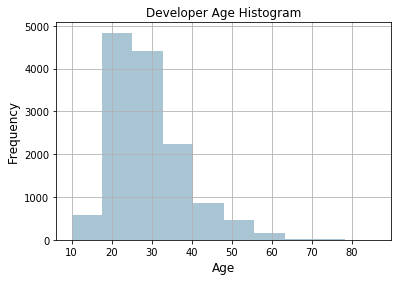

In [62]:
import matplotlib.pyplot as plt
fcc_survey_df = pd.read_csv('datasets/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
print(fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head(3))
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

### Binning based on rounding


``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [64]:
#按照10等比例划分
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


### 分位数切分
```
按照指定的分数比例对数据进行切分
```

In [65]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

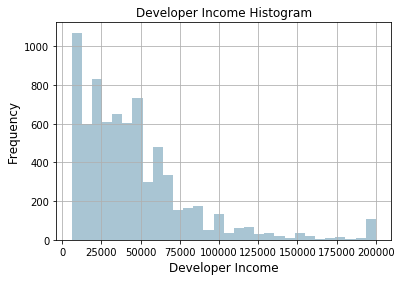

In [66]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [67]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

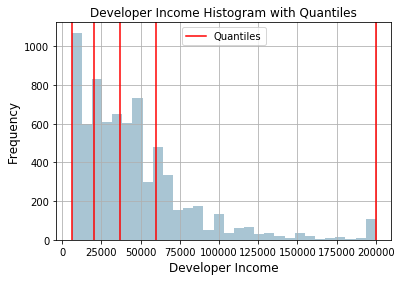

In [68]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [69]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


### COX-BOX 对数变换

In [70]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

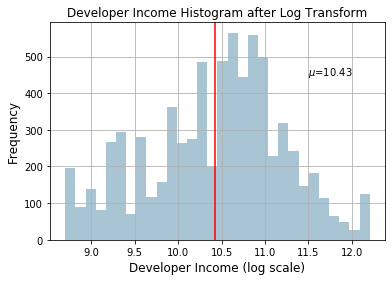

In [71]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

### 日期特征处理

In [72]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
import pytz

In [73]:
time_stamps = ['2015-03-08 10:30:00.360000+00:00', '2017-07-13 15:45:05.755000-07:00',
               '2012-01-20 22:30:00.254000+05:30', '2016-12-25 00:30:00.000000+10:00']
df = pd.DataFrame(time_stamps, columns=['Time'])
df

,Time
0,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00


In [74]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df['TS_obj'] = ts_objs
ts_objs

array([Timestamp('2015-03-08 10:30:00.360000+0000', tz='UTC'),
       Timestamp('2017-07-13 15:45:05.755000-0700', tz='pytz.FixedOffset(-420)'),
       Timestamp('2012-01-20 22:30:00.254000+0530', tz='pytz.FixedOffset(330)'),
       Timestamp('2016-12-25 00:30:00+1000', tz='pytz.FixedOffset(600)')],
      dtype=object)

In [75]:
df['Year'] = df['TS_obj'].apply(lambda d: d.year)
df['Month'] = df['TS_obj'].apply(lambda d: d.month)
df['Day'] = df['TS_obj'].apply(lambda d: d.day)
df['DayOfWeek'] = df['TS_obj'].apply(lambda d: d.dayofweek)
df['DayName'] = df['TS_obj'].apply(lambda d: d.weekday_name)
df['DayOfYear'] = df['TS_obj'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['TS_obj'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['TS_obj'].apply(lambda d: d.quarter)

df[['Time', 'Year', 'Month', 'Day', 'Quarter', 
    'DayOfWeek', 'DayName', 'DayOfYear', 'WeekOfYear']]

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


,Time,Year,Month,Day,Quarter,DayOfWeek,DayName,DayOfYear,WeekOfYear
0,2015-03-08 10:30:00.360000+00:00,2015,3,8,1,6,Sunday,67,10
1,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,3,Thursday,194,28
2,2012-01-20 22:30:00.254000+05:30,2012,1,20,1,4,Friday,20,3
3,2016-12-25 00:30:00.000000+10:00,2016,12,25,4,6,Sunday,360,51


### 时间特征处理

In [76]:
df['Hour'] = df['TS_obj'].apply(lambda d: d.hour)
df['Minute'] = df['TS_obj'].apply(lambda d: d.minute)
df['Second'] = df['TS_obj'].apply(lambda d: d.second)
df['MUsecond'] = df['TS_obj'].apply(lambda d: d.microsecond)   #毫秒
df['UTC_offset'] = df['TS_obj'].apply(lambda d: d.utcoffset()) #UTC时间位移

df[['Time', 'Hour', 'Minute', 'Second', 'MUsecond', 'UTC_offset']]

,Time,Hour,Minute,Second,MUsecond,UTC_offset
0,2015-03-08 10:30:00.360000+00:00,10,30,0,360000,00:00:00
1,2017-07-13 15:45:05.755000-07:00,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,22,30,0,254000,05:30:00
3,2016-12-25 00:30:00.000000+10:00,0,30,0,0,10:00:00


In [78]:
#按照早晚切分时间
hour_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['TimeOfDayBin'] = pd.cut(df['Hour'], 
                            bins=hour_bins, labels=bin_names)
df[['Time', 'Hour', 'TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,10,Morning
1,2017-07-13 15:45:05.755000-07:00,15,Afternoon
2,2012-01-20 22:30:00.254000+05:30,22,Night
3,2016-12-25 00:30:00.000000+10:00,0,Late Night
